<a href="https://colab.research.google.com/github/diegovrosales/SP1_POSTER_GRUPO4/blob/master/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'http://192.241.140.81/sp1data/KAG_energydata_complete.csv'
df1 = pd.read_csv(url)

In [4]:
# df1
row_count = len(df1)
print("Numero de columnas: " + str(row_count))
# Vamos a dividir el data set en 75% train data y 25% test data
train_data_count = len(df1) * .75
test_data_count = round(len(df1) * .25)
print("Numero de columnas de training: " +  str(train_data_count))
print("Numero de columnas de test: "  +  str(test_data_count))

Numero de columnas: 19735
Numero de columnas de training: 14801.25
Numero de columnas de test: 4934


In [5]:
df1.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [0]:
from sklearn.model_selection import train_test_split

# 75% de la data es usada para entrenamiento para los modelos el resto es usada para el testing
train, test = train_test_split(df1,test_size=0.25,random_state=40)

In [0]:
# Dividimos las columnas por grupos para tener un mejor manejo de la data
column_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
column_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
column_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
column_light = ["lights"]
column_randoms = ["rv1", "rv2"]
column_target = ["Appliances"]
# Separamos las variables dependientes e independientes
feature_vars = train[column_temp + column_hum + column_weather + column_light + column_randoms]
target_vars = train[column_target]

In [8]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,40.432370,39.252994,39.041339,50.939261,54.596942,35.401239,42.944133,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,4.081775,3.263513,4.355528,8.964531,31.163493,5.134281,5.240388,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,37.900000,36.900000,35.530000,45.400000,30.023333,31.500000,39.069091,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,40.500000,38.560000,38.400000,49.090000,55.290000,34.900000,42.397143,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,43.290000,41.790000,42.193333,53.694286,83.126667,39.000000,46.560000,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [9]:
max_temp = train[column_temp].max()
min_temp = train[column_temp].min()
maximun_temp = max_temp.max()
minimun_temp = min_temp.min()

print("Temperatura maxima: " + str(round(maximun_temp)))
print("Temperatura minima: " + str(round(minimun_temp)))

Temperatura maxima: 30
Temperatura minima: -6


Datos de consumo menores a 25% (x < 270.0 Wh): 13707 Datos
Datos de consumo mayores de 25% y menores a 50% (270.0 Wh > x < 540.0 Wh): 842 Datos
Datos de consumo mayores de 50% y menores a 75% (540.0Wh > x < 810.0 Wh): 165 Datos
Datos de consumo mayores de 75% y menores a 100% (810.0Wh > x < 108.0 Wh): 10 Datos
Max consumo: 1080
Porcentaje del consumo appliance que es menor que 200 Wh
Appliances    90.250659
dtype: float64


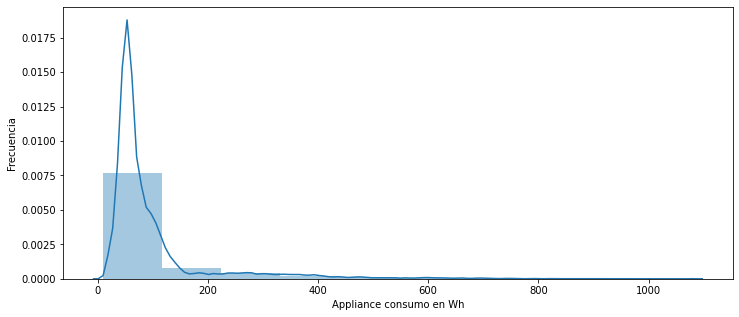

In [10]:
# Chequeamos la distrubución de consumo
array_values = target_vars.Appliances
max_apliance = target_vars.Appliances.values.max()
array_keys = target_vars.Appliances.sort_index()
up_to_25 = 0
up_to_50 = 0
up_to_75 = 0
up_to_100 = 0

for row in array_keys.keys():
    if(array_values.get(row) > max_apliance*0 and array_values.get(row) < max_apliance*.25):
      up_to_25 = up_to_25 + 1
      # print("Key: " + str(row) + " Value: "+str(array_values.get(row)))
    if(array_values.get(row) > max_apliance*.25 and array_values.get(row) < max_apliance*.50):
      up_to_50 = up_to_50 + 1
    if(array_values.get(row) > max_apliance*.50 and array_values.get(row) < max_apliance*.75):
      up_to_75 = up_to_75 + 1
    if(array_values.get(row) > max_apliance*.75 and array_values.get(row) < max_apliance*1):
      up_to_100 = up_to_100 + 1
     
print("Datos de consumo menores a 25% (x < "+ str( max_apliance*.25) +" Wh): "+ str(up_to_25) + " Datos")  
print("Datos de consumo mayores de 25% y menores a 50% ("+ str( max_apliance*.25) +" Wh > x < "+ str( max_apliance*.50) +" Wh): "+ str(up_to_50) + " Datos")  
print("Datos de consumo mayores de 50% y menores a 75% ("+ str( max_apliance*.50) +"Wh > x < "+ str( max_apliance*.75) +" Wh): "+ str(up_to_75) + " Datos")  
print("Datos de consumo mayores de 75% y menores a 100% ("+ str( max_apliance*.75) +"Wh > x < "+ str( max_apliance*.100) +" Wh): "+str(up_to_100) + " Datos") 
print("Max consumo: " + str(max_apliance))     

print('Porcentaje del consumo appliance que es menor que 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumo en Wh')
plt.ylabel('Frecuencia')
sns.distplot(target_vars , bins=10 ) ;

In [11]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.3MB/s 


In [12]:
import pydot
#import cartopy

#Importamos chart_studio plotly para graficar
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

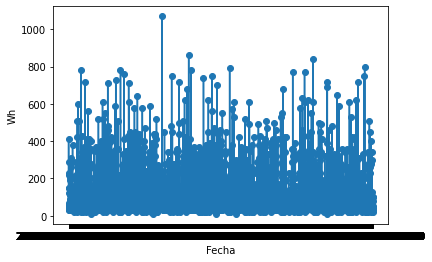

In [13]:
# To understand the timeseries variation of the applaince energy consumption
plt.xlabel('Fecha')
plt.ylabel('Wh')
plt.plot(test.date , test.Appliances , '-o')
plt.show()


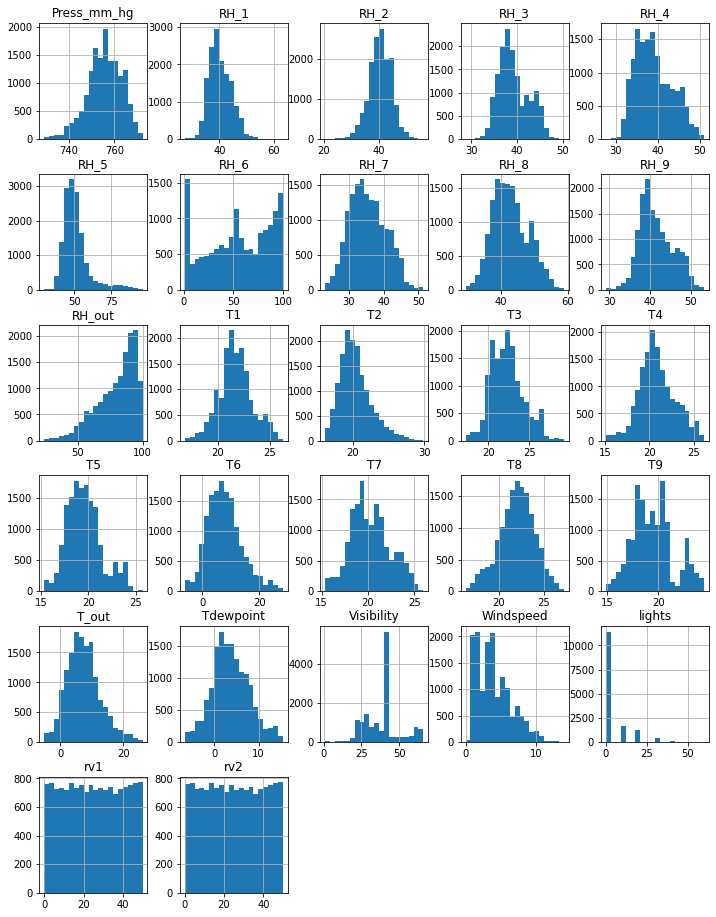

In [14]:
# Histrograma de todas las features para entender la distribucion de datos (Cantidad de datos VR Distribucion de datos)
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

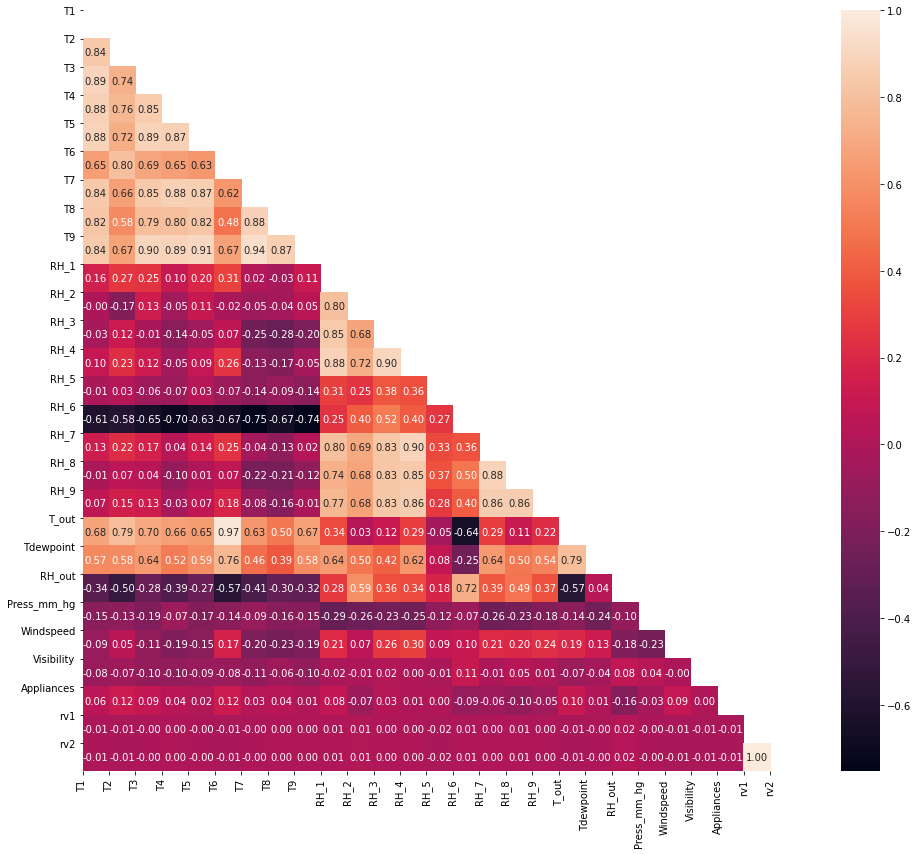

In [15]:
train_corr = train[column_temp + column_hum + column_weather +column_target+column_randoms]
corr = train_corr.corr()
# Enmascaramos los valores repetidos (Cuando un elemento de la mascara es falso, este corresponde a un elemento asociado con el array)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generacion del mapa de calor 
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [0]:
# Pre procesamiento de la data
# Dividimos los dataset entre variables dependientes e independientes
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + column_target ]

test = test[list(test_X.columns.values) + column_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']


In [17]:
sc_train.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,-0.831930,0.349500,0.441571,0.201598,-1.398755,-0.629413,-1.197521,-1.234796,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,1.922273,2.039003,1.250473,1.250473,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,-0.398471,1.299615,1.112907,1.549493,0.004687,0.604569,0.228904,-0.009491,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-1.104045,-0.479715,1.468790,1.468790,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.927664,0.297243,0.822507,0.238072,1.388043,1.101918,-0.212353,1.045908,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.140422,2.039003,0.048731,0.048731,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-1.291694,-0.363087,0.087967,-0.295781,-1.125096,-0.629413,-1.367589,-0.852893,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-1.542436,-0.479715,-1.459682,-1.459682,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,0.472833,-0.579502,-0.564579,-0.937398,1.789743,1.680118,2.300361,2.332439,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,1.752573,0.779644,-1.121664,-1.121664,-0.464759


In [0]:
# Remove Appliances column from traininig set
train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [0]:
# Ya que estamos tratando con un problema de regresion 
# El análisis de regresión es una forma de técnica de modelado predictivo que investiga la relación entre una  variable (s) dependiente (objetivo) e independiente (predictor). 
# El metodo de regresion a utilizar es: Random Forest
# Un bosque aleatorio es una técnica de conjunto capaz de realizar tareas de regresión con el uso de múltiples árboles de decisión y una técnica llamada embolsado.
#  y funciona bien en datos de alta dimensión.


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = [ ['Linear Regression: ', LinearRegression()], ['RandomForest ',RandomForestRegressor(n_estimators=150)]]
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Modelo"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Tiempo de Entrenamiento"] = end - start
    curr_model_data["Puntaje Entranamiento R2"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Puntaje Test R2"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Puntaje TEST RMSE R2"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [20]:
model_data

[{'Modelo': 'Linear Regression: ',
  'Puntaje Entranamiento R2': 0.1688479754483403,
  'Puntaje TEST RMSE R2': 0.9215533758867674,
  'Puntaje Test R2': 0.15073937539170223,
  'Tiempo de Entrenamiento': 0.03235769271850586},
 {'Modelo': 'RandomForest ',
  'Puntaje Entranamiento R2': 0.9310639379417127,
  'Puntaje TEST RMSE R2': 0.6955377461134034,
  'Puntaje Test R2': 0.5162272437314869,
  'Tiempo de Entrenamiento': 57.15718412399292}]

In [21]:
# Convert list to dataframe
df = pd.DataFrame(model_data)
df

,Modelo,Tiempo de Entrenamiento,Puntaje Entranamiento R2,Puntaje Test R2,Puntaje TEST RMSE R2
0,Linear Regression:,0.032358,0.168848,0.150739,0.921553
1,RandomForest,57.157184,0.931064,0.516227,0.695538


In [23]:
train_X

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,-0.831930,0.349500,0.441571,0.201598,-1.398755,-0.629413,-1.197521,-1.234796,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,1.922273,2.039003,1.250473,1.250473
19366,1.254979,0.298556,1.561061,1.344290,0.163277,-0.398471,1.299615,1.112907,1.549493,0.004687,0.604569,0.228904,-0.009491,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-1.104045,-0.479715,1.468790,1.468790
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.927664,0.297243,0.822507,0.238072,1.388043,1.101918,-0.212353,1.045908,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.140422,2.039003,0.048731,0.048731
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-1.291694,-0.363087,0.087967,-0.295781,-1.125096,-0.629413,-1.367589,-0.852893,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-1.542436,-0.479715,-1.459682,-1.459682
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,0.472833,-0.579502,-0.564579,-0.937398,1.789743,1.680118,2.300361,2.332439,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,1.752573,0.779644,-1.121664,-1.121664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0.046620,-0.156204,-0.134008,-0.126339,0.277231,0.049785,-0.030546,1.247858,0.256309,0.417267,0.669085,-0.240953,0.380830,-0.272110,0.055507,-0.313830,-0.620357,-0.648978,0.127820,0.341816,0.150881,-0.102909,-0.839939,0.140422,-0.479715,0.774524,0.774524
16065,-0.302185,-1.065724,-0.084006,-0.293010,0.005912,-1.018247,-0.462849,0.134089,0.057358,-0.963579,-0.056931,-1.275660,-1.074075,-0.518646,-0.462211,-1.110463,-0.262865,-0.500996,-1.069376,-0.744302,0.853140,1.235312,-1.248270,-0.920203,-0.479715,0.884828,0.884828
14501,-0.053039,0.844268,0.216006,0.751137,0.222967,0.845466,0.487266,-0.270762,0.400549,-0.704147,-1.159429,-1.088739,-0.976112,-0.614211,-1.537116,-0.605994,-0.714500,-0.880151,0.479752,0.079238,-0.818905,0.953700,-0.023279,-0.948486,-0.479715,-0.173205,-0.173205
14555,0.927974,1.142893,0.511018,0.996241,0.856043,1.755128,0.937892,0.407407,0.355785,-0.639917,-1.193729,-0.816017,-1.040974,-1.183139,-1.719921,-1.040901,-0.860805,-1.248906,1.874909,0.512890,-2.156542,0.550431,-0.023279,-0.015136,-0.479715,0.505400,0.505400


In [24]:
model = [['RandomForest ',RandomForestRegressor()]]
rc2_metric = []
model_data = []
for name,curr_model in model :
    for x in range(20):
      if(x != 0):
        curr_model_data = {}
        curr_model.random_state = 78
        curr_model.n_estimators = x * 10
        curr_model.fit(train_X,train_y)
        rc2_metric.append(sqrt(mean_squared_error(test_y,curr_model.predict(test_X))))
rc2_metric

[0.7397332958852605,
 0.7176746130427292,
 0.7081776613100216,
 0.7055382746833664,
 0.7045427235921282,
 0.7009418061494291,
 0.698511380770456,
 0.6981513553410575,
 0.6988631883438039,
 0.6987181937636561,
 0.6974671135378154,
 0.6957290084457021,
 0.6962540828131923,
 0.6963327064401666,
 0.6955377461134034,
 0.6954968803003206,
 0.6948853561163155,
 0.6948451416531823,
 0.6945665210919242]

In [0]:
trees = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
plt.xlabel('Numero de Arboles')
plt.ylabel('RMSE')
plt.plot(trees , rc2_metric , '-o')
plt.show()

In [0]:
RFRe = model[0][1]
RFRe.feature_importances_
print (sorted(zip(map(lambda x: round(x, 4), RFRe.feature_importances_), feature_vars), reverse=True))